# Cockroach Data Analysis

Congrats! You've made it this far in your Python journey. Now we are going to take some of the data you collected from the motor neurons in the cockroach leg and use Python to perform some analyses on our neural population recordings. Here we will explore some first-step analyses and then build some hypothesis that we can test. Let's get started!

## At the end of this notebook you will be able to

* Calculate a spike rate
* Calculate a peri-stimulus time histogram
* Generate a hypothesis about neural activity
* Compare multiple conditions






### Install and import necessary packages, define useful functions

In [1]:
!pip install pydub

from pydub import AudioSegment
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
#necessary functions

def filter_spikes(samples, threshold):
  """
  Identifies spikes in a signal by thresholding.

  Args:
    samples: A NumPy array of audio samples.
    threshold: The threshold above which a sample is considered a spike.

  Returns:
    A NumPy array of spike times.
  """
  spike_times = []
  for i, sample in enumerate(samples):
    if sample > threshold:
      spike_times.append(i / data.frame_rate)  # Convert index to time
  return np.array(spike_times)

In [ ]:
def generate_psth(spike_times, bin_size=0.1, xlabel, ylabel):
  """
  Generates a Peri-Stimulus Time Histogram (PSTH) from spike times.

  Args:
    spike_times: A NumPy array of spike times.
    bin_size: The width of each time bin in seconds.

  Returns:
    None. Displays the PSTH plot.
  """
  # Calculate the time range
  start_time = 0
  end_time = np.max(spike_times)

  # Create time bins
  bins = np.arange(start_time, end_time + bin_size, bin_size)

  # Calculate spike counts in each bin
  spike_counts, _ = np.histogram(spike_times, bins=bins)

  # Calculate spike rates
  spike_rates = spike_counts / bin_size

  # Plot the PSTH as a line plot
  plt.plot(bins[:-1], spike_rates)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title('Peri-Stimulus Time Histogram (PSTH)')
  plt.show()

SyntaxError: non-default argument follows default argument (<ipython-input-1-d772681917dc>, line 1)

### Step 1: Load your data

In [ ]:
#First, upload your m4a file of interest into the Files tab to the left. Then write the name of your file here

filename = "BYB Recording 7-25-2024-11-07-19-4AM.m4a" #YOUR file name

data = AudioSegment.from_file(filename)

### Step 2: Visualize your recording

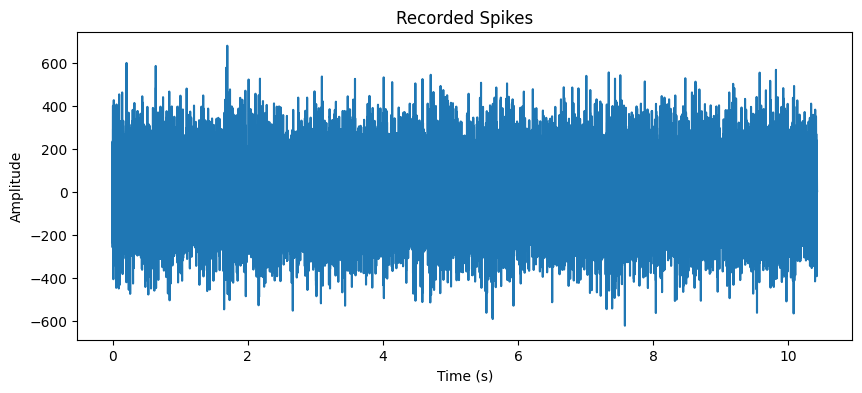

In [ ]:
# plot the .m4a file as an audio wave

# Convert the data to a NumPy array
samples = np.array(data.get_array_of_samples())

# Create the time axis
time = np.linspace(0, len(samples) / data.frame_rate, num=len(samples))

# Plot the waveform
plt.figure(figsize=(10, 4))
plt.plot(time, samples)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Recorded Spikes')
plt.show()


### Spikesorting

Now let's spikesort. Spikesorting is the process in which we seperate voltage changes due to noise from voltage changes due to the voltage changes caused by spiking neurons. The changes in voltage caused by signaling neurons is very small and the system were recording in is very noisy. To get a clearer picture of what's happening, lets process the data a little.

First we need to decide on a threshold. This is going to set a line at y=threshold such that every point that crosses it gets considered a spike and every fluctuation below that line gets considered noise. Use the above plot to gain some intuition about what values you should try. Play with a range of values and look at the resulting plot below to see if those spikes times make sense given your data. The plot below plots both the waveform and then the spike times as red dots at the time at which a spike occured given your inputed threshold.

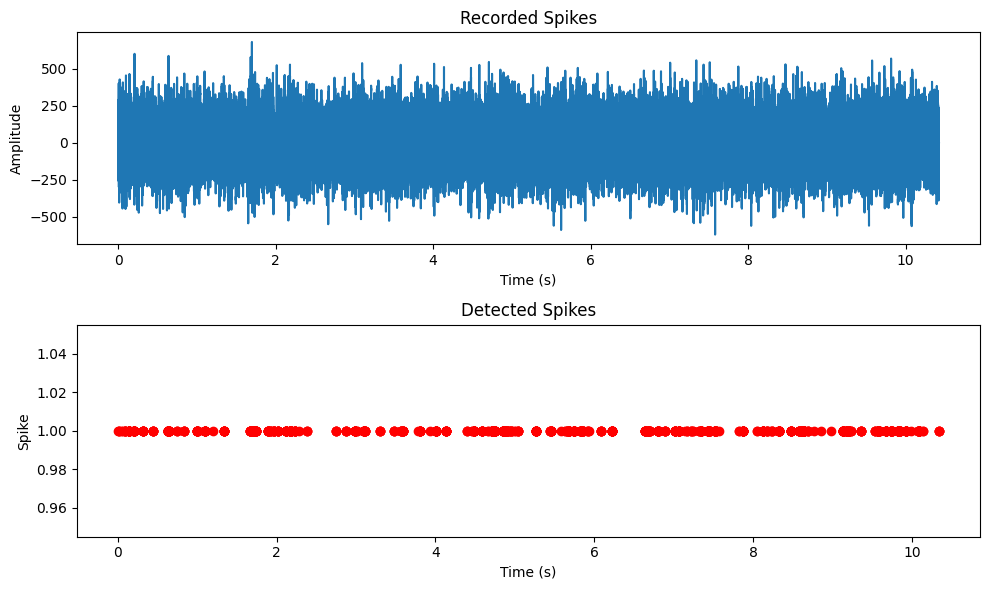

In [ ]:
# Set a threshold for spike detection
threshold = 400  # Adjust this value based on your data

# Filter the spikes
spike_times = filter_spikes(samples, threshold)

# Plot the original waveform and the detected spikes
plt.figure(figsize=(10, 6))

# Plot the waveform
plt.subplot(2, 1, 1)
plt.plot(time, samples)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Recorded Spikes')

# Plot the spike times
plt.subplot(2, 1, 2)
plt.plot(spike_times, np.ones_like(spike_times), 'ro')  # Plot spikes as red dots
plt.xlabel('Time (s)')
plt.ylabel('Spike')
plt.title('Detected Spikes')

plt.tight_layout()
plt.show()


### Question: What does our array spike_times consist of? How can we think of what it contains?

Write your answer here:

## Analysis

Now lets perform some analyses. Let's first start with calculating the overall spike rate of the recording. Rates are calculated in Hertz (Hz) which is 1/s

So if we want to know a spike rate that means we need to calculate some x divided by some y.

(Hint: First youwill need to get the number of spikes and then the exact length of the recording, you can do both by using the len() function of two different arrays)

### Question: what should we calculate?

Let's try to do it below

In [ ]:
# this is a space for you to calculate what your spike rate is

That was a spike rate for an entire recording. What if we want to analyze just a subset of the recording? Pick a time window that is interesting to record from and see if you can look at just the spike rate for that time window

In [ ]:
# this is a space for you to calculate a spike rate for just a time window

Now lets try to look at the spike rate as a function of time. We will plot what is called a peri-stimulus time histogram or PSTH which shows us how the spike rate changes as a function of time.

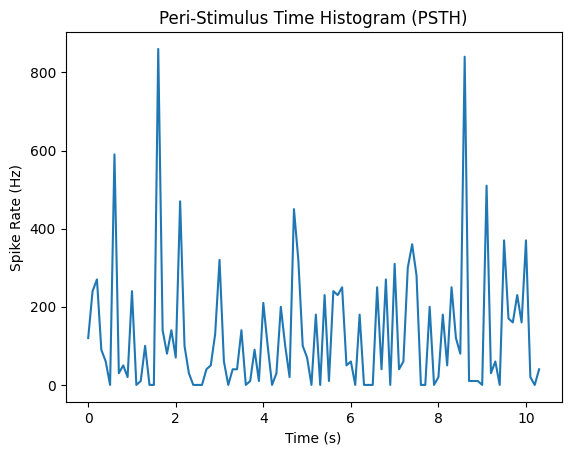

In [ ]:
#feel free to play with the bin_size. since the PSTH is a histogram, bigger bins give us less resolution, but smoother results. What is a good bin size to represent this data?

xlabel = '' #put in the label for the x axis here!
ylabel = '' #put in the label for the y axis here!
generate_psth(spike_times, bin_size=0.1, xlabel, ylabel)

## New Hypothesis and Experiments

Now that we can analyze our data in some cool ways, can we go back and generate a testable hypothesis and design a little mini experiment? An exampe of this might be "I hypothesize if I perturb the leg in a downwards motion versus an upwards motion, I will get a higher spike rate" or "I predict that the higher part of the leg will have a greater response than the lower part of the leg." Here we have two conditions we are presenting and that we can show is either true or false. Not something like "I will hold the toothpick to the leg for 5 seconds." This is a method, but is not a prediction we can test. You will then go and analyze this data. Make sure you collecgt enough data with enough repeats to test a hypothesis.

### Generate your own hypothesis:

Write here:

What is the metric you will use? How will you compare?

## Analysis

You are ultimately going to analyze the data you are colelcting. You will need to collect data with enough repeats to test the hypothesis you make.

In [ ]:
# here you can perform any new analyses you might need

## Final Step: Two sample hypothesis tests

If you want to test a difference between two groups, you should to show you're data is "statistically significant", meaning there is a difference between the two conditions that is greater than chance. You can do this here in Python by running a two-sample hypothesis test. Below is some information from Dr. Juavinett's BIPN 145 course about Two-Sample Statistincs and how to decide which test to run.

### Run two-sample statistics

Inferential statistics generalize from observed data to the world at large
Most often, the goal of our hypothesis testing is to test whether or not two distributions are different, or if a distribution has a different mean than the underlying population distribution.

The SciPy stats package has many hypothesis testing tools. For many simple cases in biology or neuroscience research, we’d like to test whether two or more distributions are different from eachother.

If we know our distributions are normal (they’re generated from a normal distribution!) we can use parametric statistics to test our hypothesis. To test for differences between normal populations, we can use the independent t-test in our stats package: stats.ttest_ind().

If we had paired samples, we would use a dependent t-test as seen here.

If one of our populations is skewed, however, we cannot use a t-test. A t-test assumes that the populations are normally distributed. For skewed populations, we can use either the Mann-Whitney U (for independent samples, stats.mannwhitneyu()) or the Wilcoxon Signed Rank Test (for dependent/paired samples,stats.wilcoxon()).

Below, there is sample code to run three different statistical tests. You should use only the one that is most appropriate for your data by uncommenting that line.

In [2]:
#Step 1: turn your two different data from two samples into a pandas dataframe

condition1_name = ''
condition2_name = ''

data_1 =  #YOUR DATA FROM GROUP 1 HERE
data_2 =  #YOUR DATA FROM GROUP 2 HERE

data = pd.DataFrame(data={condition1_name:data_1,condition2_name :data_2}) #makes a pandas dataframe to store the data

# Show the data
data

,
0,3
1,4
2,5
3,3
4,2
5,6
6,7
7,8
8,3


Below, we’ll use a seaborn plotting function called [swarmplot](https://https://seaborn.pydata.org/generated/seaborn.swarmplot.html) to plot each of our data points.

Notes: This will draw a dotted gray line for the mean, and a solid black line for the median.

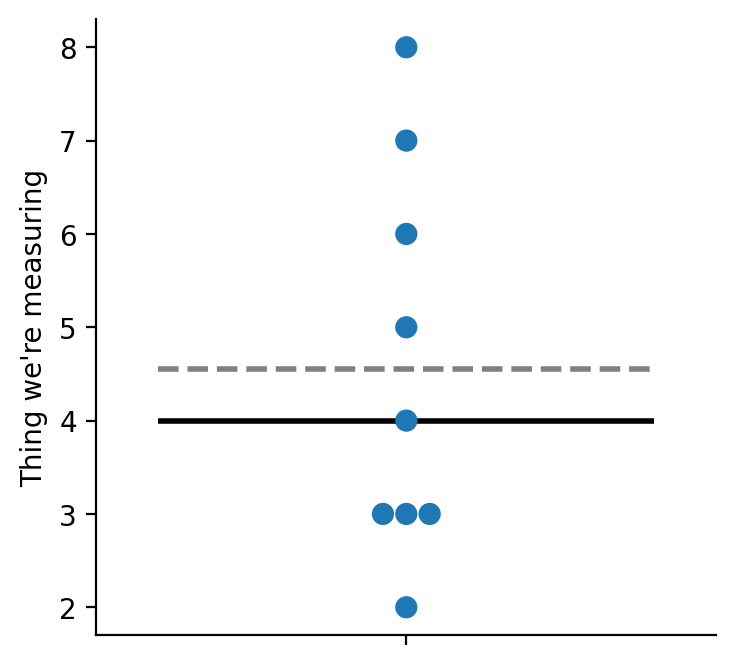

In [3]:
# Set up the plot
fig,ax = plt.subplots(1,1,figsize=(4,4))

# plot the mean line
sns.boxplot(data=data, showmeans=True,meanline=True,
            meanprops={'color': 'gray', 'ls': '--', 'lw': 2},
            medianprops={'visible': True,'color': 'black', 'ls': '-', 'lw': 2},
            whiskerprops={'visible': False},
            showfliers=False,showbox=False,showcaps=False)

# plot individual data points
sns.swarmplot(data=data,s=8)

plt.ylabel('Thing we\'re measuring') #CHANGE THIS TO AN APPROPRIATE LABEL

# Make the axes look nice!
ax.spines[['right', 'top']].set_visible(False)

plt.show()

### Check to see how skewed the data is

Before we run any hypothesis tests, we need to know if our data is skewed or not. To test for skewness, we can use `stats.skewtest` to test. This method implements the [D’Agostino-Pearson skewness test](https://www.jstor.org/stable/2684359?seq=1), one of many different tests (e.g., the Kolmogorov-Smirov test) that can be used to check the normality of a distribution. If the skew test gives us a p-value of less than 0.05, the population is skewed.

---

**Task:** Run the cell below, but then change the
sample to data_2 (or create a separate cell for data_2 to test your second group of data points).





The skewtest p-value is 0.346991576561619385898893597187


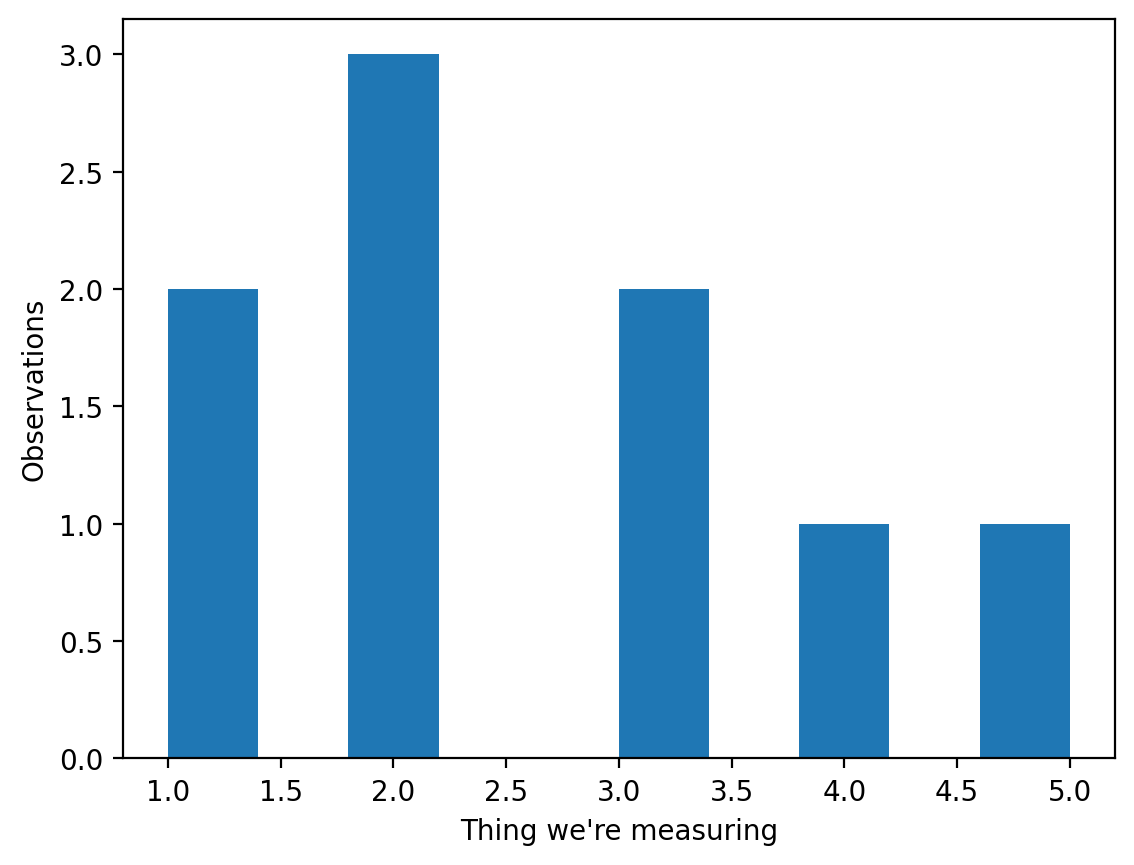

In [4]:
sample = data_1 # Choose which data to use

stat,pvalue = stats.skewtest(sample) # Run the skew test

# Print the p value of the skew test up to 30 decimal points
print('The skewtest p-value is ' + '%.30f' % pvalue)

plt.hist(sample) # Create a histogram
plt.ylabel('Observations')
plt.xlabel('Thing we\'re measuring')
plt.show()

## Run two-sample statistics
### *Inferential statistics* generalize from observed data to the world at large

Most often, the goal of our hypothesis testing is to test whether or not two distributions are different, or if a distribution has a different mean than the underlying population distribution.

The SciPy stats package has many [hypothesis testing tools](https://docs.scipy.org/doc/scipy/reference/stats.html). For many simple cases in biology or neuroscience research, we’d like to test whether two or more distributions are different from eachother.

If we know our distributions are normal (they’re generated from a normal distribution!) we can use **parametric statistics** to test our hypothesis. To test for differences between normal populations, we can use the independent t-test in our stats package: `stats.ttest_ind()`.

If we had paired samples, we would use a dependent t-test as seen [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel).

If one of our populations is skewed, however, **we cannot use a t-test**. A t-test assumes that the populations are normally distributed. For skewed populations, we can use either the [Mann-Whitney U](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html#scipy.stats.mannwhitneyu) (for independent samples, `stats.mannwhitneyu()`) or the [Wilcoxon Signed Rank Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html#scipy.stats.wilcoxon) (for dependent/paired samples,`stats.wilcoxon()`).

Below, there is sample code to run three different statistical tests. **You should use only the one that is most appropriate for your data by uncommenting that line.**

In [5]:
print(stats.ttest_ind(data_1,data_2)) # to run an independent t-test
# print(stats.ttest_rel(data_1,data_2)) # to run an dependent t-test
# print(stats.mannwhitneyu(data_1,_2)) # to run a mannwhitneyu
# print(stats.wilcoxon(data_1,data_2)) # to run a wilcoxon signed rank test

TtestResult(statistic=-2.4382276613229465, pvalue=0.026796307428331737, df=16.0)


Congrats! You have now ran some stats. How do you determine if your two different groups are statistically significant or not based on the outputs of this result?

In statistics, we generally look at the [p-value](https://study.com/skill/learn/how-to-interpret-the-results-of-a-hypothesis-test-for-the-difference-in-means-of-two-independent-groups-explanation.html) for this. The p value gives us some idea of how likely this difference is a product of chance rather than if the two groups are actually different. As scientists we generally consider the benchmark of p < 0.05 to be statistically signficant. This means that we have determined these results would have less than a 5% chance of occuring due to randomness.

Are your results statistically significant?